# Importações

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import root_mean_squared_error
from tqdm import tqdm
import time
import os 

# Gerando os dois tipos de dados sintéticos de curvaturas 

In [ ]:
curves = []

x = np.linspace(0, 1, 1000) 

n_values = np.linspace(0.1, 10, 100)

for n in n_values: 
    epsilon_x = np.random.normal(0, 0.002, len(x)) 
    y = x**(n) + epsilon_x
    curves.append(y)
    

df_curves = pd.DataFrame(
    np.array(curves).T,
    index = x,
    columns = [f'n_{n:.2f}' for n in n_values]
)

In [7]:
df_curves 

,n_0.10,n_0.20,n_0.30,n_0.40,n_0.50,n_0.60,n_0.70,n_0.80,n_0.90,n_1.00,...,n_9.10,n_9.20,n_9.30,n_9.40,n_9.50,n_9.60,n_9.70,n_9.80,n_9.90,n_10.00
0.000000,0.001784,-0.000509,-0.002258,-0.004584,-0.000740,-0.000211,0.001972,-0.000502,-0.002222,0.000740,...,0.003721,-0.000238,0.000349,0.003228,0.003051,-0.000652,0.000590,0.002943,-0.001090,-0.001753
0.001001,0.498880,0.249729,0.127745,0.064614,0.033956,0.016703,0.009680,0.005782,0.002638,0.000866,...,-0.000959,-0.001247,-0.001272,-0.001204,0.002576,0.000789,0.002226,-0.001118,-0.000824,0.001333
0.002002,0.536368,0.291240,0.156113,0.084200,0.045442,0.024461,0.011272,0.007346,0.004225,0.003878,...,0.000831,-0.000349,-0.001154,-0.001550,0.002388,-0.001653,-0.002415,-0.000192,0.002930,-0.001098
0.003003,0.557600,0.314149,0.170980,0.096497,0.054295,0.031557,0.014720,0.009643,0.009231,-0.000701,...,-0.002269,0.000144,0.002772,0.000818,0.001683,0.000118,0.001430,-0.000290,0.003514,0.001287
0.004004,0.576647,0.330600,0.191987,0.108893,0.059562,0.033155,0.022938,0.007479,0.009345,0.004833,...,0.001643,-0.000728,-0.000043,0.002193,0.002414,0.002455,0.001753,0.000466,-0.001636,-0.000312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.995996,0.998606,0.999343,0.999406,0.998373,0.994851,0.996249,0.995882,0.998784,0.993428,0.997770,...,0.964930,0.965302,0.961474,0.964705,0.960657,0.964727,0.957789,0.959324,0.959067,0.960916
0.996997,0.998694,0.998679,1.002455,1.001279,0.998404,1.002737,0.999698,0.997963,0.997207,0.994784,...,0.976295,0.973048,0.974771,0.972164,0.971509,0.968040,0.971719,0.970655,0.974764,0.969730
0.997998,1.003546,0.998246,0.999590,0.997375,1.000224,1.000172,0.999369,0.995883,0.998660,0.996086,...,0.985036,0.982624,0.976373,0.980467,0.980516,0.981514,0.979283,0.984622,0.981865,0.982789
0.998999,1.002172,1.001099,1.001191,0.998088,1.002341,1.002650,0.995732,0.996943,0.999109,0.995943,...,0.989473,0.990808,0.991117,0.988408,0.991406,0.988931,0.989902,0.989963,0.988702,0.987517


In [ ]:
curves_line = []

gamma = 0.25

x_line = np.linspace(0, 1, 1000) 

n_values_line = np.linspace(0.1, 10, 100) + gamma

for n in n_values_line: 
    epsilon_x_line = np.random.normal(0, 0.003, len(x))
    y_line = x_line**(n) + epsilon_x
    curves_line.append(y_line)
    

df_curves_line = pd.DataFrame(
    np.array(curves_line).T,
    index = x,
    columns = [f'n_{n:.2f}' for n in n_values_line]
)

In [36]:
df_curves_line

,n_0.35,n_0.45,n_0.55,n_0.65,n_0.75,n_0.85,n_0.95,n_1.05,n_1.15,n_1.25,...,n_9.35,n_9.45,n_9.55,n_9.65,n_9.75,n_9.85,n_9.95,n_10.05,n_10.15,n_10.25
0.000000,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,...,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395,-0.000395
0.001001,0.091433,0.046965,0.024676,0.013504,0.007904,0.005097,0.003690,0.002985,0.002631,0.002454,...,0.002276,0.002276,0.002276,0.002276,0.002276,0.002276,0.002276,0.002276,0.002276,0.002276
0.002002,0.110817,0.058228,0.029976,0.014799,0.006646,0.002266,-0.000087,-0.001351,-0.002030,-0.002395,...,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818,-0.002818
0.003003,0.130052,0.072356,0.040078,0.022021,0.011919,0.006267,0.003105,0.001337,0.000347,-0.000206,...,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909,-0.000909
0.004004,0.144480,0.083036,0.047659,0.027290,0.015562,0.008809,0.004921,0.002683,0.001394,0.000652,...,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355,-0.000355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.995996,0.996505,0.996104,0.995704,0.995303,0.994903,0.994503,0.994104,0.993704,0.993305,0.992905,...,0.961090,0.960704,0.960318,0.959931,0.959546,0.959160,0.958774,0.958389,0.958004,0.957618
0.996997,0.996698,0.996398,0.996097,0.995797,0.995497,0.995197,0.994897,0.994597,0.994297,0.993998,...,0.970021,0.969729,0.969437,0.969145,0.968852,0.968560,0.968269,0.967977,0.967685,0.967393
0.997998,1.001824,1.001624,1.001424,1.001223,1.001023,1.000823,1.000623,1.000423,1.000223,1.000023,...,0.983962,0.983766,0.983569,0.983372,0.983176,0.982979,0.982783,0.982586,0.982390,0.982194
0.998999,0.999640,0.999540,0.999440,0.999340,0.999240,0.999140,0.999040,0.998940,0.998839,0.998739,...,0.990670,0.990571,0.990472,0.990373,0.990273,0.990174,0.990075,0.989976,0.989877,0.989778


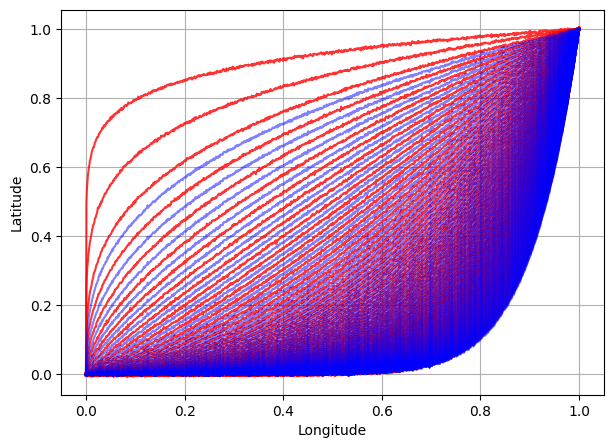

In [37]:
#Plotando ambas as curvas 

plt.figure(figsize=(7, 5))

for col in df_curves.columns: 
    plt.plot(df_curves[col], color = 'red', alpha = 0.8)

for col in df_curves_line.columns: 
    plt.plot(df_curves_line[col], color = 'blue', alpha = 0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Implementação da GRU para reconstrução das rotas 

### Treinamento da GRU com as curvas do df_curves 

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

class GRUScratch:
    def __init__(self, num_inputs, num_hiddens, sigma=0.01):
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        
        init_weight = lambda *shape: tf.Variable(tf.random.normal(shape) * sigma)
        triple = lambda: (
            init_weight(num_inputs, num_hiddens),
            init_weight(num_hiddens, num_hiddens),
            tf.Variable(tf.zeros(num_hiddens))
        )

        self.W_xz, self.W_hz, self.b_z = triple()
        self.W_xr, self.W_hr, self.b_r = triple()
        self.W_xh, self.W_hh, self.b_h = triple()

    def forward(self, inputs, H=None):
        if H is None:
            H = tf.zeros((inputs.shape[1], self.num_hiddens))

        outputs = []

        for X in tf.unstack(inputs, axis=0):
            Z = tf.sigmoid(tf.matmul(X, self.W_xz) + tf.matmul(H, self.W_hz) + self.b_z)
            R = tf.sigmoid(tf.matmul(X, self.W_xr) + tf.matmul(H, self.W_hr) + self.b_r)
            H_tilde = tf.tanh(tf.matmul(X, self.W_xh) + tf.matmul(R * H, self.W_hh) + self.b_h)
            H = (1 - Z) * H + Z * H_tilde
            outputs.append(H)

        return tf.stack(outputs), H

class GRUModel:
    def __init__(self, num_inputs, num_hiddens, num_outputs):
        self.gru = GRUScratch(num_inputs, num_hiddens)
        self.W_hq = tf.Variable(tf.random.normal((num_hiddens, num_outputs)) * 0.01)
        self.b_q = tf.Variable(tf.zeros(num_outputs))

    def __call__(self, X, H=None):
        Hs, H = self.gru.forward(X, H)
        Y = tf.matmul(Hs, self.W_hq) + self.b_q
        return Y, H

    @property
    def trainable_variables(self):
        return (
            self.gru.W_xz, self.gru.W_hz, self.gru.b_z,
            self.gru.W_xr, self.gru.W_hr, self.gru.b_r,
            self.gru.W_xh, self.gru.W_hh, self.gru.b_h,
            self.W_hq, self.b_q
        )

@tf.function
def train_step(model, X, Y):
    with tf.GradientTape() as tape:
        Y_hat, _ = model(X)
        loss = loss_fn(Y, Y_hat)

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

def validate_step_by_step(model, X_val):
    H = None
    preds = []

    for t in range(X_val.shape[0]):
        x_t = X_val[t:t+1]
        y_t, H = model(x_t, H)
        preds.append(y_t.numpy().squeeze())

    return tf.convert_to_tensor(preds)


In [ ]:
inicio = time.time()

X = df_curves.values.T.astype(np.float32)

X = (X - X.mean(axis=1, keepdims=True)) / \
    (X.std(axis=1, keepdims=True) + 1e-8)   

X_c = X[:, :, np.newaxis]  

X_in  = X_c[:, :-1, :]              
Y_out = X_c[:,  1:, :]              

X_in  = tf.transpose(X_in,  [1, 0, 2])   
Y_out = tf.transpose(Y_out, [1, 0, 2])  

X_in  = tf.cast(X_in,  tf.float32)
Y_out = tf.cast(Y_out, tf.float32)

model = GRUModel(num_inputs = 1, num_hiddens = 32, num_outputs = 1)

for epoch in tqdm(range(200), desc = "Training GRU"): 
    loss = train_step(model, X_in, Y_out)
    if epoch % 20 == 0:
        tqdm.write(f"Epoch {epoch} | Loss: {loss.numpy(): .6f}")

fim = time.time()

tempo = fim - inicio

Training GRU:   1%|          | 2/200 [02:11<2:58:33, 54.11s/it] 

Epoch 0 | Loss:  0.999475


Training GRU:  11%|█         | 22/200 [02:15<00:36,  4.93it/s] 

Epoch 20 | Loss:  0.961394


Training GRU:  21%|██        | 42/200 [02:18<00:24,  6.55it/s]

Epoch 40 | Loss:  0.675404


Training GRU:  31%|███       | 62/200 [02:21<00:20,  6.67it/s]

Epoch 60 | Loss:  0.152751


Training GRU:  41%|████      | 82/200 [02:24<00:18,  6.29it/s]

Epoch 80 | Loss:  0.086202


Training GRU:  51%|█████     | 102/200 [02:27<00:13,  7.18it/s]

Epoch 100 | Loss:  0.050581


Training GRU:  61%|██████    | 122/200 [02:30<00:12,  6.45it/s]

Epoch 120 | Loss:  0.035268


Training GRU:  71%|███████   | 142/200 [02:33<00:08,  7.02it/s]

Epoch 140 | Loss:  0.026731


Training GRU:  81%|████████  | 162/200 [02:36<00:05,  7.06it/s]

Epoch 160 | Loss:  0.021433


Training GRU:  91%|█████████ | 182/200 [02:39<00:02,  7.01it/s]

Epoch 180 | Loss:  0.017815


Training GRU: 100%|██████████| 200/200 [02:42<00:00,  1.23it/s]


### Aplicação do modelo para reconstrução das curvas do df_curves_line

In [ ]:
Xl = df_curves_line.values.T.astype(np.float32)

Xl = (Xl - Xl.mean(axis=1, keepdims=True)) / \
    (Xl.std(axis=1, keepdims=True) + 1e-8)    

X_cl = Xl[:, :, np.newaxis]  

X_inl  = X_cl[:, :-1, :]              
Y_outl = X_cl[:,  1:, :]              

X_inl  = tf.transpose(X_inl,  [1, 0, 2])   
Y_outl = tf.transpose(Y_outl, [1, 0, 2])  

X_inl  = tf.cast(X_inl,  tf.float32)
Y_outl = tf.cast(Y_outl, tf.float32)

H = None
preds = []

T = X_inl.shape[0]   
B = X_inl.shape[1]  

for t in range(T):
    x_t = X_inl[t:t+1]  
    
    y_t, H = model(x_t, H)

    preds.append(y_t)

predicao = tf.concat(preds, axis=0)  # (T, batch, 1)


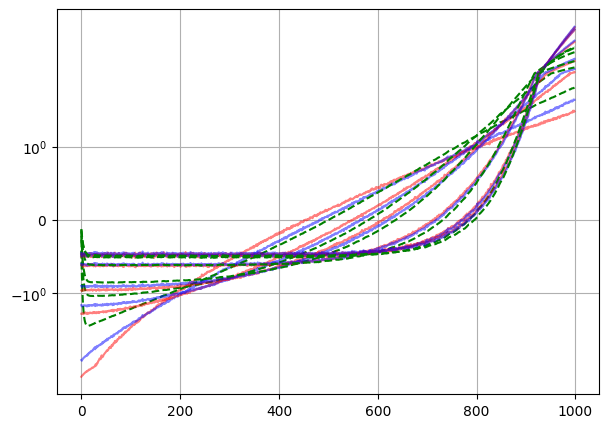

In [84]:
plt.figure(figsize=(7, 5))

idxs = [5, 15, 25, 55, 86, 95]

for idx in idxs: 
    plt.plot(Y_out[:, idx, 0], label='df_curves', color = 'red', alpha = 0.5)
    plt.plot(Y_outl[:, idx, 0], label='df_curves_line', color = 'blue', alpha = 0.5)
    plt.plot(predicao[:, idx, 0], '--', label='GRU Reconstruction', color = 'green')

plt.yscale('symlog')
plt.grid(True)
plt.show()

In [ ]:
rmse_por_curva = []

for i in range(Y_outl.shape[1]):  
    rmse = root_mean_squared_error(
        Y_outl[:, i, 0].numpy(),
        predicao[:, i, 0].numpy()
    )
    rmse_por_curva.append(rmse)

df_rmse = pd.Series(rmse_por_curva)

df_rmse

0     0.212508
1     0.198003
2     0.184863
3     0.173239
4     0.162989
        ...   
95    0.172235
96    0.173960
97    0.175674
98    0.177377
99    0.179070
Length: 100, dtype: float64